# The First Part of the Assignment of IDS 2019-2020
Document your results as well as the way you obtained them in this jupyter notebook. A seperate report (pdf, word etc.) is _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. *DO NOT CLEAR THE OUTPUT of the notebook your are submitting!* In the cases that the result of an algorithm is pdf, jpg, etc, you should attach the result to this notebook file and refer to that in the text.  

Next to the jupyter notebook, submit one zip-file containing all data sets that you are asked to submit. Make sure they are easily identifiable, i.e. use names as requested in the corresponding question.

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file and your created data sets in moodle.

Only <font color="red">one </font> group member should upload your group's solution. *Make sure to include group members' names and matriculation numbers*. If your name and student id are not included in the report, you will not receive any points!


Hint 1: While answering the questions, you will get a better and better impression of the given data. However, feel free to compute additional results and vizualizations to motivate the decisions you need to make, for example with respect to modification, simplification or sampling of the data. <font color="red"><b>Ensure that all claims you make are supported by the presented facts!</b></font>

Hint 2: <font color="red"><b>Some of the tasks might need some time to run. Take this into account in your planning.</b></font>

Hint 3: RWTHonline allows for multiple submissions (each submission overwrites the previous ones). <font color="red"><b>Partial submissions are possible and encouraged. </b></font> This helps in case of technical problems of RWTHonline, which do seldomly happen.

<font color="red"><b>Student Names and IDs:
    1. Yaping Chen 379645
    2. Haikun Huang 391180
    3. Yu He 391644

## Preprocessing of the Dataset (5 points)
 You should carry out some preprocessing steps before starting the analysis:
 - Select 90% of 'population_density' dataset by random sampling.
     - Use one of the group member's student number as a seed.
 - Add another column to the dataset:
     - Name it 'population_density_categorical'.
     - The values in this column depend on values in 'population_density' column and will be defined as follows:
        - 5824=<population density              corresponding value in 'population_density_categorical' column: 'very high'
        - 4368=<population density<5824         corresponding value in 'population_density_categorical' column: 'high'
        - 2912=<population density<4368         corresponding value in 'population_density_categorical' column: 'medium'
        - 1456=<population density<2912         corresponding value in 'population_density_categorical' column: 'low' 
        - population density<1456               corresponding value in 'population_density_categorical' column: 'very low'
 - After completing this preprocessing step, export your final dataset as 'population_density_categorical.csv' dataset and use that for next steps of the assignment.
 - If it is not directly mentioned, you should always use your extracted (above-created) dataset (without any cleaning).
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your result in moodle.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from p_decision_tree.DecisionTree import DecisionTree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.preprocessing import MinMaxScaler

ModuleNotFoundError: No module named 'p_decision_tree'

In [3]:
data_pop = pd.read_csv("population_density.csv", delimiter=',')
df_pop = pd.DataFrame(data_pop).sample(frac=0.9, random_state=391180)
max = df_pop['population_density'].max()
df_pop['population_density_categorical'] = pd.cut(
    df_pop.population_density,
    bins=[0, 1456, 2912, 4368, 5824, max + 1],
    labels=['very low', 'low', 'medium', 'high', 'very high'],
    right=False)  # default is ( ] , right=False means [ )
# df_pop.to_csv("population_density_categorical.csv")

## Question 1 - Insights into the Data (20 points):

### Dealing with Outliers (10 points)
   (a) Use a boxplot to find and remove the outliers from "temperature". Note that based on the boxplot the values greater than upper-whisker and less than lower-whisker are considered as the outliers. Now you should  have two datasets (cleaned and original).

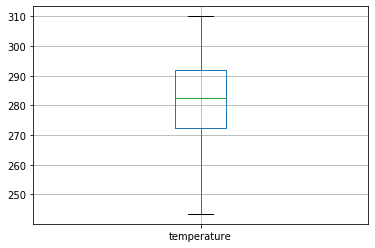

In [4]:
data_pop = pd.read_csv("population_density_categorical.csv", delimiter=',')
df_pop = pd.DataFrame(data_pop)
df_pop_original = df_pop

Q1 = df_pop['temperature'].quantile(0.25)
Q3 = df_pop['temperature'].quantile(0.75)
IQR = Q3 - Q1
filter = (df_pop['temperature'] >= Q1 - 1.5 * IQR) & (df_pop['temperature'] <=
                                                      Q3 + 1.5 * IQR)
df_pop_cleaned = df_pop.loc[filter]
# df_pop.boxplot(column=['temperature'])
df_pop_cleaned.boxplot(column=['temperature'])

   (b) Compare basic statistical features of "temperature" (median, mean, and mode) in the cleaned and original datasets.    Interpret the differences for these statistical values between the cleaned and original datasets. 

In [5]:
# Your code:

# df_pop_cleaned
mean_cleaned = df_pop_cleaned.temperature.mean()
median_cleaned = df_pop_cleaned.temperature.median()
mode_cleaned = df_pop_cleaned.temperature.mode()
# df_pop_original
mean_original = df_pop_original.temperature.mean()
median_original = df_pop_original.temperature.median()
mode_original = df_pop_original.temperature.mode()
# difference
diff_mean = mean_original - mean_cleaned
diff_median = median_original - median_cleaned
diff_mode = mode_original - mode_cleaned

print(
    f'mean: \n original= {mean_original} ,\n cleaned= {mean_cleaned} ,\n difference = {diff_mean}'
)
print(
    f'median:\n original= {median_original} ,\n cleaned= {median_cleaned} ,\n difference = {diff_median}'
)
print(
    f'mode:\n original= {mode_original} ,\n cleaned= {mode_cleaned} ,\n difference = {diff_mode}'
)

# When we calculate the mean value, outliers are calculated by algorithm,but the up outliers and down outliers are both filterd
# the value change not so much.
# The value of median means the value in the center of all sorted dataset, as we filtered out some outliers, so the median is also chaned.
# As the amount of outliers are quiet small, so the result of median is always the same.

mean: 
 original= 281.22923259727077 ,
 cleaned= 281.28110077001094 ,
 difference = -0.0518681727401713
median:
 original= 282.48 ,
 cleaned= 282.49 ,
 difference = -0.009999999999990905
mode:
 original= 0    274.15
dtype: float64 ,
 cleaned= 0    274.15
dtype: float64 ,
 difference = 0    0.0
dtype: float64


   (c) Compare the number of data rows before and after removing the outliers. How many data rows are removed by removing    outliers?

In [6]:
# Your code:
print('The number of outliers = ',df_pop_original.shape[0] - df_pop_cleaned.shape[0])

The number of outliers =  8


### Basic Visualization (10 points)
   (d) Visualize mean and median of "population_density" for non-'None' "holiday" values in the original dataset. Specify    the "holiday" values for which the mean of "population_density" is maximal and for which it is minimal.

# discuss something 'Specify the "holiday" values for which the mean of "population_density" is maximal and for which it is minimal.'

The mean of population_density =  881.4
The median of population_density =  833.0
The max_value of population_density =  1538
The min_value of population_density =  455


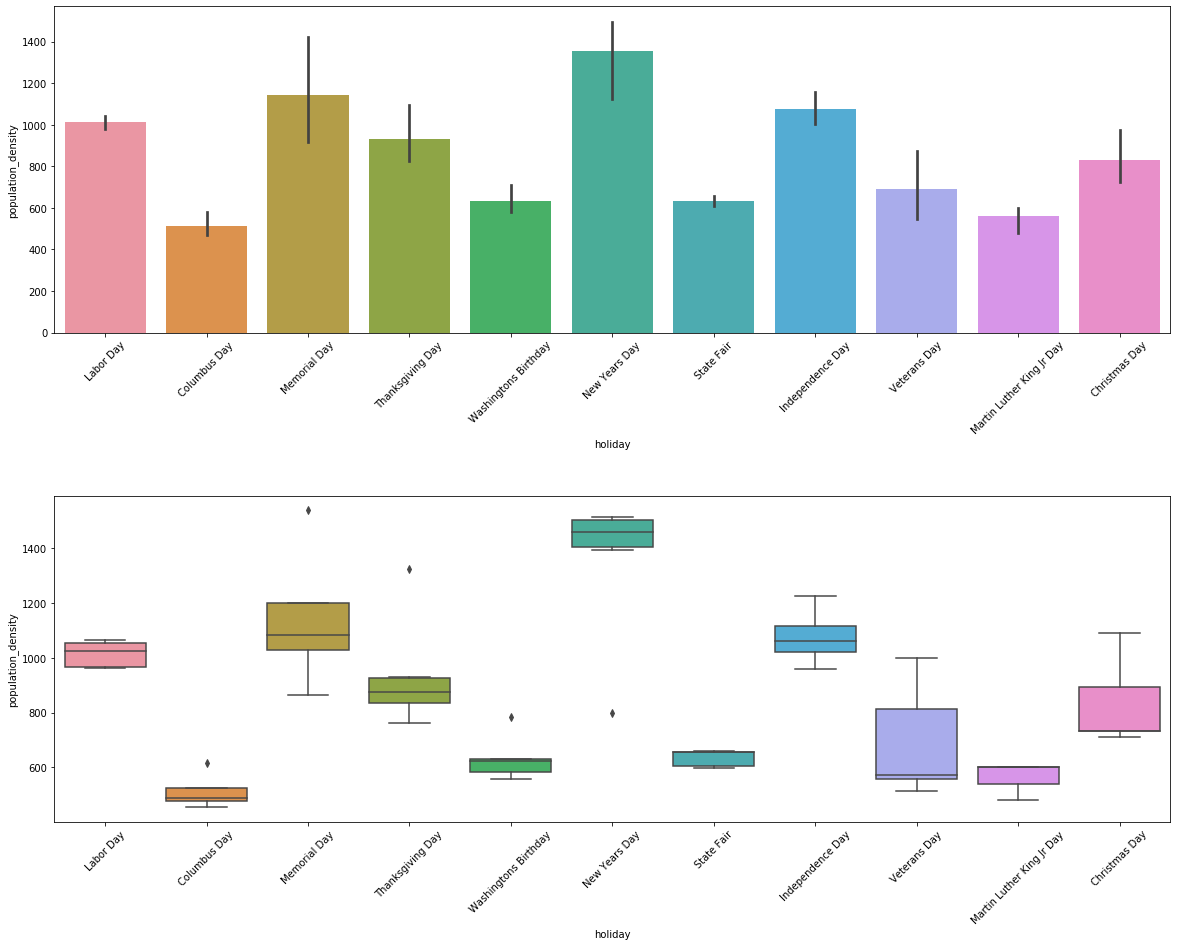

In [7]:
# Your code:
col_pop_original_holiday = df_pop_original[~df_pop_original['holiday'].isin(['None'])] #filter out the row of 'None' in column 'holiday'
# print(col_pop_original_holiday.shape[0])
mean_col_pop_original_holiday_pop = col_pop_original_holiday['population_density'].mean()
median_col_pop_original_holiday_pop = col_pop_original_holiday['population_density'].median()
max_col_pop_original_holiday_pop = col_pop_original_holiday['population_density'].max()
min_col_pop_original_holiday_pop = col_pop_original_holiday['population_density'].min()

print('The mean of population_density = ',mean_col_pop_original_holiday_pop)
print('The median of population_density = ',median_col_pop_original_holiday_pop)
print('The max_value of population_density = ',max_col_pop_original_holiday_pop)
print('The min_value of population_density = ',min_col_pop_original_holiday_pop)

fig,ax=plt.subplots(2,1,figsize=(20,15))
plt.subplots_adjust(wspace = 0, hspace = 0.5) #plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

# plt.figure(figsize=(15,10))
# plt.xticks(rotation=70)
for tick in ax[0].get_xticklabels():
        tick.set_rotation(45)
for tick in ax[1].get_xticklabels():
        tick.set_rotation(45)

sns.barplot(x="holiday", y="population_density", data=col_pop_original_holiday,ax=ax[0])
sns.boxplot(x = "holiday", y = "population_density", data=col_pop_original_holiday,ax=ax[1])


   (e) Plot the distribution of "temperature" in the original and cleaned datasets.

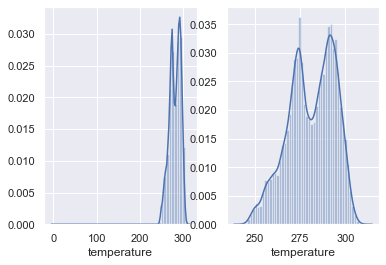

In [8]:
# Your code:
sns.set(color_codes=True)

pltfig,axes=plt.subplots(1,2)
sns.distplot(df_pop_original['temperature'],ax=axes[0])
sns.distplot(df_pop_cleaned['temperature'],ax=axes[1])

   (f) Explore the distribution of "population_density" and "temperature" together in the cleaned dataset. Specify the ranges of "temperature" and "population_density" for which the frequency of the data is the highest.

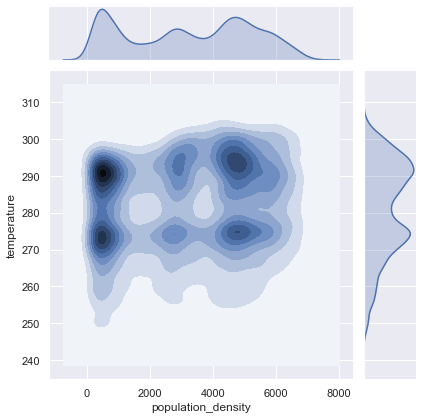

In [9]:
# Your code:

df_pop_cleaned_pop_a_temp = pd.DataFrame(df_pop_cleaned, columns=["population_density", "temperature"])
sns.jointplot(x="population_density", y="temperature", data=df_pop_cleaned_pop_a_temp, kind="kde");  #kind= scatter, hex, reg,kde 


## Question 2 - Decision Trees (15 points):


(a) Add a categorical temperature column to the cleaned dataset based on the following rules and name it                "temperature_categorical":
        - temperature >= upper_quartile (third quartile) corresponding value in 'temperature_categorical' column: 'high'
        - temperature <= lower_quartile (first quartile) corresponding value in 'temperature_categorical' column: 'low'
        - lower_quartile < temperature < upper_quartile corresponding value in 'temperature_categorical' column: 'medium'

In [10]:
# Your code:
df_pop_cleaned = df_pop_cleaned.copy()
Q1_temp = df_pop_cleaned['temperature'].quantile(0.25)
Q3_temp = df_pop_cleaned['temperature'].quantile(0.75)

df_pop_cleaned['temperature_categorical'] = np.nan
df_pop_cleaned.loc[df_pop_cleaned.temperature <= Q1_temp, 'temperature_categorical'] = 'low'
df_pop_cleaned.loc[(df_pop_cleaned.temperature > Q1_temp) & (df_pop_cleaned.temperature < Q3_temp), 'temperature_categorical'] = 'medium'
df_pop_cleaned.loc[df_pop_cleaned.temperature >= Q3_temp, 'temperature_categorical'] = 'high'
#print(df_pop_cleaned.shape)

   (b) In the new dataset (created in Section 'a'), consider "holiday", "temperature_categorical", and "weather_type" as the descriptive features and "population_density_categorical" as the target feature. Set the minimum number of samples  for splitting to 5000 and make a decision tree based on entropy.

In [11]:
# Your code:
from p_decision_tree.DecisionTree import DecisionTree

data = df_pop_cleaned[['holiday','temperature_categorical','weather_type','population_density_categorical']].copy()
columns = data.columns

#All columns except the last one are descriptive by default
descriptive_features = columns[:-1]
#The last column is considered as label
label = columns[-1]

#Converting all the columns to string
for column in columns:
    data[column]= data[column].astype(str)

data_descriptive = data[descriptive_features].values
data_label = data[label].values

print("descriptive features:")
print(descriptive_features)
print("\ntarget feature:\n" + label)

#Calling DecisionTree constructor (the last parameter is criterion which can also be "gini")
decisionTree = DecisionTree(data_descriptive.tolist(), descriptive_features.tolist(), data_label.tolist(), "entropy")

#Here you can pass pruning features (gain_threshold and minimum_samples)
decisionTree.id3(0,5000)

#Visualizing decision tree by Graphviz
dot = decisionTree.print_visualTree( render=True )

print("System entropy: ", format(decisionTree.entropy))
print("System gini: ", format(decisionTree.gini))


ModuleNotFoundError: No module named 'p_decision_tree'

(c) What is the best attribute (based on entropy) for splitting the tree in the second round of ID3?  

Explanation: <br> 
The best attribute for splitting the tree in the second round of ID3 is "Holiday", since the Information gain of holiday is highest, and in the decision tree "holiday" is selected.<br>

## Question 3 - Regression (10 points):

For this question (Q3), restrict your extracted data set to the columns *holiday, temperature, rain_1h, snow_1h, clouds_percentage, date_time* and *population_density*. Drop the information on the date for *date_time* and restrict the data to time values (hour) only.

We define *population_density* to be our target feature, while all other features are considered descriptive.

In [12]:
# Your code:

from sklearn.linear_model import LinearRegression

data_pop_3 = data_pop.copy()
data_pop_3 = data_pop_3[['holiday', 'temperature', 'rain_1h', 'snow_1h', 'clouds_percentage', 'date_time', 'population_density']]
temp = pd.DatetimeIndex(data_pop_3['date_time'])
data_pop_3['time'] =  temp.hour
data_pop_3 = data_pop_3.drop(['date_time'], axis=1)
data_pop_3


,holiday,temperature,rain_1h,snow_1h,clouds_percentage,population_density,time
0,None,277.790,0.00,0.00,1,304,4
1,None,290.330,0.00,0.00,90,6382,16
2,None,300.400,0.00,0.00,1,4723,13
3,None,289.690,0.00,0.00,1,2415,21
4,None,283.300,0.00,0.00,90,4335,18
5,None,267.890,0.00,0.00,20,4238,12
6,None,292.880,0.00,0.00,90,4675,12
7,None,291.470,0.00,0.00,1,930,4
8,None,272.890,0.00,0.00,1,2100,7
9,None,296.420,0.00,0.00,75,2659,21


   (a) Which features are suitable as an input for linear regression and which need to be modified first? Why?

Explanation: <br>
temperature, rain_1h, snow_1h, clouds_percentage and time are sutiable as an input, because all feature are the  number. <br>
But holiday must be modified first by dummy-code, for categorical column because holiday is categorical descriptive feature.

   (b) Implement and briefly motivate an adequate modification. Print the resulting data set limited to the first two data rows.

In [14]:
# Your code:
df_holiday = pd.get_dummies(data_pop_3['holiday'])
# data_pop_3 = data_pop_3.drop(['holiday'],axis = 1)
data_pop_3 = data_pop_3.join(df_holiday)
data_pop_3.head(2)

ValueError: columns overlap but no suffix specified: Index(['Christmas Day', 'Columbus Day', 'Independence Day', 'Labor Day',
       'Martin Luther King Jr Day', 'Memorial Day', 'New Years Day', 'None',
       'State Fair', 'Thanksgiving Day', 'Veterans Day',
       'Washingtons Birthday'],
      dtype='object')

(c) To get a first idea about our data, plot the behaviour of the target feature (population_density) over time (date_time).

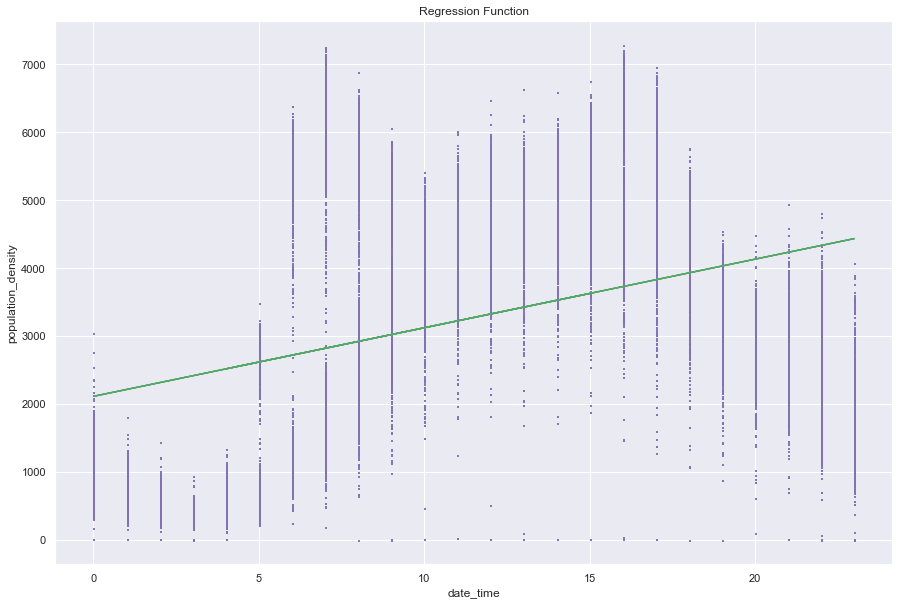

In [20]:
# Your code:

#define the classifier
classifier = LinearRegression()

#train the classifier
model = classifier.fit(data_pop_3[['time']], data_pop_3[['population_density']])
y_pred = classifier.predict(data_pop_3[['time']])

plt.figure(figsize=(15,10))
plt.scatter(data_pop_3[['time']], data_pop_3[['population_density']], color = "m", marker = "s", s = 1)
plt.plot(data_pop_3[['time']], y_pred, color = "g") 
plt.xlabel('date_time') 
plt.ylabel('population_density')
plt.title('Regression Function')
plt.show()


   (d) Create two distinct subsets of the data. Use sampling methods as described in the lecture. You should end up with two DIFFERENT sample data sets *RegA, RegB*. Include these data sets in the submitted data set zip file. 
   
   Which sampling methods did you choose and why? Which one do you expect to result in a better classifier?

In [15]:
# Your code:

from sklearn.model_selection import train_test_split

# random split
train_set_rand, test_set_rand = train_test_split(data_pop_3, test_size=0.5, random_state=42)
train_set_rand

# stratify split
train_set_stratify, test_set_stratify = train_test_split(data_pop_3, stratify = data_pop_3['holiday'], test_size=0.5, random_state=42)
train_set_stratify

# train_set_rand.to_csv("RegA.csv")
# train_set_stratify.to_csv("RegB.csv")

,holiday,temperature,rain_1h,snow_1h,clouds_percentage,population_density,time,Christmas Day,Columbus Day,Independence Day,Labor Day,Martin Luther King Jr Day,Memorial Day,New Years Day,None,State Fair,Thanksgiving Day,Veterans Day,Washingtons Birthday
18003,None,293.880,0.00,0.0,75,4875,15,0,0,0,0,0,0,0,1,0,0,0,0
27489,None,285.510,0.00,0.0,90,543,0,0,0,0,0,0,0,0,1,0,0,0,0
2898,None,301.940,0.00,0.0,40,6197,17,0,0,0,0,0,0,0,1,0,0,0,0
39507,None,255.930,0.00,0.0,90,2470,20,0,0,0,0,0,0,0,1,0,0,0,0
24088,None,290.190,0.00,0.0,1,2327,23,0,0,0,0,0,0,0,1,0,0,0,0
11707,None,271.740,0.00,0.0,90,4208,17,0,0,0,0,0,0,0,1,0,0,0,0
33946,None,281.220,0.00,0.0,1,379,1,0,0,0,0,0,0,0,1,0,0,0,0
16589,None,273.680,0.00,0.0,90,834,4,0,0,0,0,0,0,0,1,0,0,0,0
20405,None,298.510,0.00,0.0,76,4198,13,0,0,0,0,0,0,0,1,0,0,0,0
40793,None,283.216,0.00,0.0,20,4688,15,0,0,0,0,0,0,0,1,0,0,0,0


Explanation:<br>
We use random and stratified sampling in order to reduce the size of dataset.<br>
The stratified sampling is better because it takes the same percentage from every holiday group.<br>

   (e) Train a linear regression classifier based on each of the two sample data sets *RegA, RegB* created before.

In [16]:
# Your code:
data_regA = pd.read_csv("RegA.csv",delimiter=',')
df_regA = pd.DataFrame(data_regA)

data_regB = pd.read_csv("RegB.csv",delimiter=',')
df_regB = pd.DataFrame(data_regB)

from sklearn.linear_model import LinearRegression

#define the classifier
classifier_regA = LinearRegression()
#train the classifier
model_regA = classifier_regA.fit(df_regA[['time']], df_regA['population_density'])
#use the trained classifier to make prediction
y_pred_regA = classifier_regA.predict(df_regA[['time']])

#define the classifier
classifier_regB = LinearRegression()
#train the classifier
model_regB = classifier_regB.fit(df_regB[['time']], df_regB['population_density'])
#use the trained classifier to make prediction
y_pred_regB = classifier_regB.predict(df_regB[['time']])



(f) Visualize both computed regression functions in one plot each, combined with the original data set. For example, you can show a plot similar to 3(c) and insert the regression functions result.

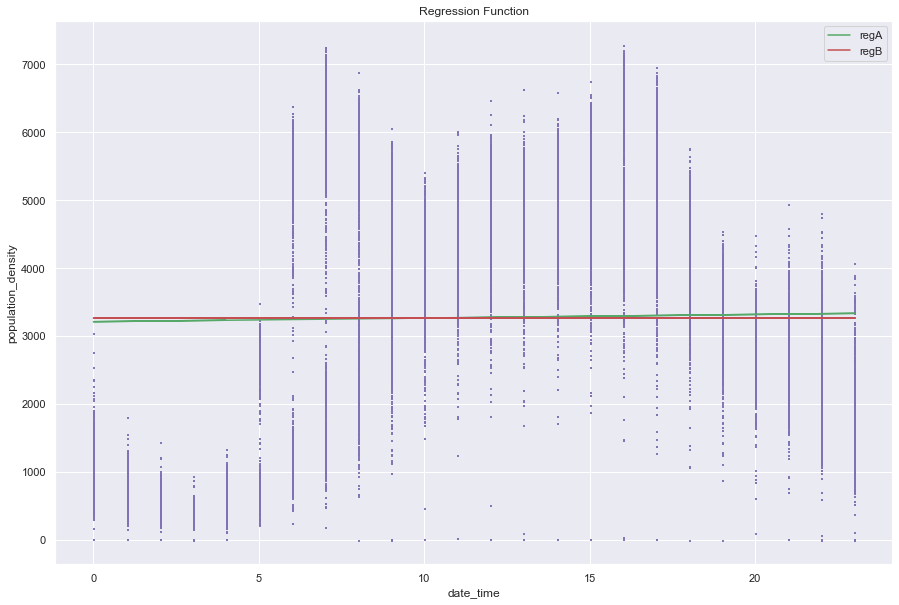

In [17]:
# Your code:

plt.figure(figsize=(15,10))
#visualize original data points
plt.scatter(data_pop_3[['time']], data_pop_3[['population_density']], color = "m", marker = "s", s = 1)
#visualize regression function
plt.plot(df_regA[['time']], y_pred_regA, color = "g", label = "regA")
plt.plot(df_regB[['time']], y_pred_regB, color = "r", label = "regB")
plt.xlabel('date_time') 
plt.ylabel('population_density')
plt.title('Regression Function')
plt.legend(loc = "best")
plt.show()


   (g) For each of the two resulting models compute and print the mean squared error, mean absolute error and median squared error with respect to the original, non-sampled data set. Also, present plots showing the errors and squared errors.

# <font color=red>showing the errors and squared errors?</font>

RegA Mean squared error: 3975599.4074341045

RegA Mean absolute error: 1752.1188054171755

RegA Median absolute error: 1798.551860859406


RegB Mean squared error: 3973190.203549897

RegB Mean absolute error: 1751.790558518134

RegB Median absolute error: 1800.9121665418954



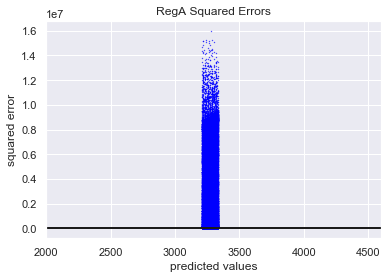

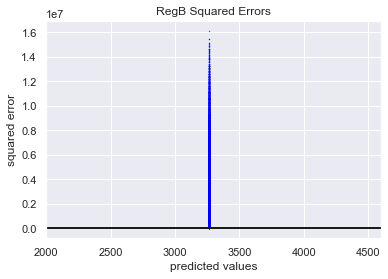

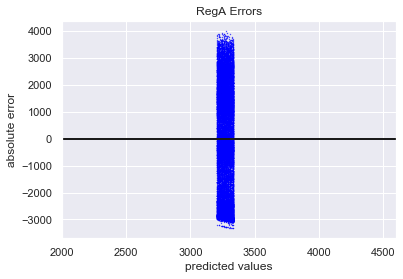

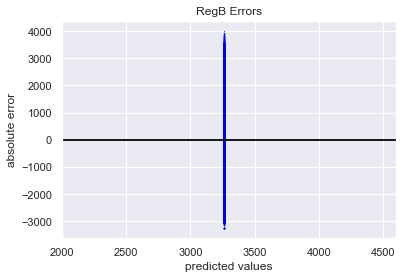

In [18]:
# Your code:

from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

print("RegA Mean squared error:",mean_squared_error(data_pop_3['population_density'][:len(y_pred_regA)], y_pred_regA))
print()
print("RegA Mean absolute error:",mean_absolute_error(data_pop_3['population_density'][:len(y_pred_regA)], y_pred_regA))
print()
print("RegA Median absolute error:",median_absolute_error(data_pop_3['population_density'][:len(y_pred_regA)], y_pred_regA))
print()
print()
print("RegB Mean squared error:",mean_squared_error(data_pop_3['population_density'][:len(y_pred_regB)], y_pred_regB))
print()
print("RegB Mean absolute error:",mean_absolute_error(data_pop_3['population_density'][:len(y_pred_regB)], y_pred_regB))
print()
print("RegB Median absolute error:",median_absolute_error(data_pop_3['population_density'][:len(y_pred_regB)], y_pred_regB))
print()


plt.scatter(y_pred_regA, (data_pop_3['population_density'][:len(y_pred_regA)] - y_pred_regA) ** 2, color = "blue", s = 0.1) 
plt.title("RegA Squared Errors")
## plotting line for zero error 
plt.hlines(y = 0, xmin = 2000, xmax = 4600, linewidth = 2)
plt.xlim((2000, 4600))
plt.xlabel('predicted values')
plt.ylabel('squared error')
plt.show()

plt.scatter(y_pred_regB, (data_pop_3['population_density'][:len(y_pred_regB)] - y_pred_regB) ** 2, color = "blue", s = 0.1) 
plt.title("RegB Squared Errors")
## plotting line for zero error 
plt.hlines(y = 0, xmin = 2000, xmax = 4600, linewidth = 2)
plt.xlim((2000, 4600))
plt.xlabel('predicted values')
plt.ylabel('squared error')
plt.show()

plt.scatter(y_pred_regA, (data_pop_3['population_density'][:len(y_pred_regA)] - y_pred_regA), color = "blue", s = 0.1,) 
plt.title("RegA Errors")
plt.hlines(y = 0, xmin = 2000, xmax = 4600, linewidth = 2)
plt.xlim((2000, 4600))
plt.xlabel('predicted values')
plt.ylabel('absolute error')
plt.show()

plt.scatter(y_pred_regB, (data_pop_3['population_density'][:len(y_pred_regB)] - y_pred_regB), color = "blue", s = 0.1,) 
plt.title("RegB Errors")
plt.hlines(y = 0, xmin = 2000, xmax = 4600, linewidth = 2)
plt.xlim((2000, 4600))
plt.xlabel('predicted values')
plt.ylabel('absolute error')
plt.show()

   (h) Interpret and evaluate the two models and compare them. Why are they similar/different? Which model do you recommend and why? How do you think the applied methods could be improved to get better results?

Explanation:<br>
At first there's a mistake in the question that there has no the median squared error, hence we calculate the median absoulute error instead of the median squared error.<br>
In the model A it has more smaller mean squared error and mean absolute error, but model B has more smaller median absoulte error. In conclusion we think model A is better to fit the dataset, hence we recommend model A. In general these two models are more similar, since the dataset is not large enough.<br>
To get better results we should take a larger sample, other hand we could split the outliers from initial dataset to improve the classifier. <br>


## Question 4 - Support Vector Machines (10 points):

For this question (Q4), restrict your extracted data set to the columns *holiday, temperature, rain_1h, snow_1h, clouds_percentage, date_time* and *population_density_categorical*. For *date_time*, drop the information on the date and restrict the data to time values only.
We define *population_density_categorical* to be our target feature, while all other features are considered descriptive.


In [29]:
# Your code:

from sklearn.linear_model import LinearRegression

data_pop_4 = data_pop.copy()
data_pop_4 = data_pop_4[['holiday', 'temperature', 'rain_1h', 'snow_1h', 'clouds_percentage', 'date_time', 'population_density_categorical']]
temp = pd.DatetimeIndex(data_pop_4['date_time'])
data_pop_4['time'] =  temp.hour
data_pop_4 = data_pop_4.drop(['date_time'], axis=1)
display(data_pop_4.head())


,holiday,temperature,rain_1h,snow_1h,clouds_percentage,population_density_categorical,time
0,None,277.79,0.0,0.0,1,very low,4
1,None,290.33,0.0,0.0,90,very high,16
2,None,300.40,0.0,0.0,1,high,13
3,None,289.69,0.0,0.0,1,low,21
4,None,283.30,0.0,0.0,90,medium,18


   (a) Which features are suitable as an input for SVM and which need to be modified first? Modify the data as needed and provide a brief explanation.

In [30]:
# Your code:

df_holiday = pd.get_dummies(data_pop_4['holiday'])
# df_pop_cat = pd.get_dummies(data_pop_4['population_density_categorical'])
# data_pop_3 = data_pop_3.drop(['holiday'],axis = 1)
data_pop_4 = data_pop_4.join(df_holiday)
# data_pop_4 = data_pop_4.join(df_pop_cat)
data_pop_4.head(2)


,holiday,temperature,rain_1h,snow_1h,clouds_percentage,population_density_categorical,time,Christmas Day,Columbus Day,Independence Day,Labor Day,Martin Luther King Jr Day,Memorial Day,New Years Day,None,State Fair,Thanksgiving Day,Veterans Day,Washingtons Birthday
0,None,277.79,0.0,0.0,1,very low,4,0,0,0,0,0,0,0,1,0,0,0,0
1,None,290.33,0.0,0.0,90,very high,16,0,0,0,0,0,0,0,1,0,0,0,0


Explanation:<br>
The population_density_categorical is good als feature input for SVM, but the value of population_density_categorical must be dummy-code because population_density_categorical is categorical descriptive feature.

   (b) Divide the data set into a training set *svmTrain* and a test set *svmTest* and briefly motivate your division      strategy. Include these data sets in the data set zip file you submit. 
   
   Hint: Training the SVMs will take longer for a large training set!

In [31]:
# Your code:

from sklearn.model_selection import train_test_split

# random split
svmTrain, svmTest = train_test_split(data_pop_4, test_size=0.25, random_state=42)
svmTrain = svmTrain.drop(['holiday'],axis=1)
svmTest = svmTest.drop(['holiday'],axis=1)

# svmTrain.to_csv("svmTrain.csv", index=False)
# svmTest.to_csv("svmTest.csv", index=False)

Explanation:<br>
We divide all the dataset into 75% as training set and 25% as testing set.

   (c) Use the training set to train 3 different SVMs with different combinations of the parameters. Use at least two distinct values for the parameters *kernel* and *C*.

In [33]:
# Your code:

data_svmTrain = pd.read_csv("svmTrain.csv",delimiter=',')
df_svmTrain = pd.DataFrame(data_svmTrain)

# df_svmTrain = df_svmTrain[:5000]

# data_svmTest = pd.read_csv("svmTest.csv",delimiter=',')
# df_svmTest = pd.DataFrame(data_svmTest)

#prepare input data
features = df_svmTrain.columns.tolist()
features.remove('population_density_categorical')

X = df_svmTrain[features]
y = df_svmTrain['population_density_categorical']

from sklearn.svm import SVC

classifier_1 = SVC(C=1, kernel='linear', gamma='scale') # kernel = ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
classifier_1.fit(X, y)
pred_1 = classifier_1.predict(X)

classifier_2 = SVC(C=1, kernel='poly', gamma='scale') # kernel = ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
classifier_2.fit(X, y)
pred_2 = classifier_2.predict(X)

classifier_3 = SVC(C=0.5, kernel='linear', gamma='scale') # kernel = ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
classifier_3.fit(X, y)
pred_3 = classifier_3.predict(X)

# print('Indicies of support vectors: \n', classifier.support_, '\n ') #indicies of support vectors
# print('Support vectors: \n ', classifier.support_vectors_, '\n ') #the support vectors
# print('Number of support vectors for each class: \n ', classifier.n_support_, '\n ') #the number of support vectors for each class


   (d) Compute and print the mean accurracy and classification report of the trained SVMs with respect to the test set (as shown in instruction).

In [34]:
# Your code:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('Mean accuracy_1: \n', accuracy_score(y, pred_1), '\n')
print('Classification Report_1: \n', classification_report(y, pred_1), '\n')
print()
print('Mean accuracy_2: \n', accuracy_score(y, pred_2), '\n')
print('Classification Report_2: \n', classification_report(y, pred_2), '\n')
print()
print('Mean accuracy_3: \n', accuracy_score(y, pred_3), '\n')
print('Classification Report_3: \n', classification_report(y, pred_3), '\n')

Mean accuracy_1: 
 0.5728379125945049 



/Users/hhk/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report_1: 
               precision    recall  f1-score   support

        high       0.61      0.74      0.67      9126
         low       0.44      0.35      0.39      5080
      medium       0.38      0.37      0.37      6152
   very high       0.00      0.00      0.00      3271
    very low       0.69      0.88      0.77      8909

    accuracy                           0.57     32538
   macro avg       0.42      0.47      0.44     32538
weighted avg       0.50      0.57      0.53     32538
 


Mean accuracy_2: 
 0.5716393140328232 

Classification Report_2: 
               precision    recall  f1-score   support

        high       0.59      0.76      0.67      9126
         low       0.44      0.33      0.38      5080
      medium       0.38      0.36      0.37      6152
   very high       0.00      0.00      0.00      3271
    very low       0.70      0.87      0.78      8909

    accuracy                           0.57     32538
   macro avg       0.42      0.46 

   (e) Interpret and evaluate the 3 SVMs and compare them. Why are they similar/different? Which SVM do you recommend and why?

Explanation:<br> 
These 3 SVMs have different parameters, compare classifier1 with classifier2, they have different kernel functions linear kernel and polynomial kernel, but the C of both classifier is same, in fact the classifier has higher accuracy. Compare classifier2 with classifier3 it has same situation. The second situation is compare classifier1 with classifier3, they have same linear kernel function, but the C of classifier3 is smaller, the result is that the accuracies of these two classifiers are similar.<br> 
Absolutely they are different, since they have different kernel function and C, the result is that they have different accuracies, to improve the accuracy of classifier we should try to take more different parameters.<br> 
In conlusion we recommend the classifier2, since as we can see, classifier2 have the higher accuracy under the same situation.<br> 

## Question 5 - Neural Networks (20 points)
In this question consider the whole dataset that you have created in the *Preprocessing of Dataset* section. The target feature is *population_density_categorical*. 

To avoid performance problems, use the first 4000 rows of your dataset (you will need 2000 for training and 2000 for testing).

   (a) What are the possible inputs of your network?
     - Show the possible extracted features.
     - Show the number of possible patterns of inputs for the categorical data.

In [6]:


from sklearn.model_selection import train_test_split

data_pop_5 = pd.read_csv("population_density_categorical.csv", delimiter=',')
data_pop_5 = data_pop_5.head(4000)

# from sklearn.preprocessing import MinMaxScaler
# possible inputs

df_pop_5 = df_pop.copy(deep=True)
print('Input features in dataset population_density _categorical: ')
input_features = df_pop_5.columns.values[1:-1]
print(input_features)
print('\n')

# get data type
print("Data type for different features:")
input_data=df_pop_5[input_features]
print(input_data.dtypes)
print('\n')

#normalize the numerical features:
num_data = input_data[['temperature','rain_1h','snow_1h','clouds_percentage','population_density']]
minmaxscaler = MinMaxScaler()
#keep the column and index name 
norm_num = num_data.copy(deep=True)
norm_num.loc[:,:]=  minmaxscaler.fit_transform(num_data)

# applay one hot encoding to categorical features:
cate_data = input_data[['holiday',
 'weather_type', 'weather_type_details','date_time']]
onehot_data = pd.get_dummies(cate_data)


# get the pattern number after apply one hot encoding to categorical feature.
print('The number of patterns: ',onehot_data.shape[1])


Input features in dataset population_density _categorical: 
['holiday' 'temperature' 'rain_1h' 'snow_1h' 'clouds_percentage'
 'weather_type' 'weather_type_details' 'date_time' 'population_density']


Data type for different features:
holiday                  object
temperature             float64
rain_1h                 float64
snow_1h                 float64
clouds_percentage         int64
weather_type             object
weather_type_details     object
date_time                object
population_density        int64
dtype: object


The number of patterns:  37095


**Explanation:** <br>
All the features except for the target feature and the random seed are possible inputs for neural network. but we need to do some modifications:
first of all because the NN only takes the numerical values, the categorical descriptive features need to be convert to numerical ones. besides, it's better to normalize the input.

There are 4 descriptive categoraical features i.e 'holiday',
'weather_type', 'weather_type_details' and 'date_time' in the dataset.When we  applay one hot encoding to these featruese, we can get the number of possible pattern is 37095. The number is so huge just because we also consider the date information for the time. Each of the differnt date-time will be consider as a  
category.

   (b) Before using the Neural Network algorithm, do you think it provides an accurate result? Why? 
     - Your explanation should be supported by data.

**Explanation:**<br> 
No. I think it's too trivial to consider all the date information. it will make the neural network get much more useless information. increase the computation time for training the network. and the result also tends to overfitting. Instead of using date time, if we do some processing as the task 4, just consider the time information, the number of patterns will from 37095 reduces to 62 (see following rusult). I think in these way it will makes more sense, reduce the training time and improve the accuracy. 
In another view, NN are trained on training data, there exist bias, perfectly fit the training data will leads to overfitting. more independent data make the result better.

In [7]:
# keep only time information in date time.
cate_data_wo_date = cate_data.copy(deep=True)
temp = pd.DatetimeIndex(cate_data['date_time'])
cate_data_wo_date['time'] =  temp.hour
cate_data_wo_date.drop(['date_time'], axis=1)

# applay one hot encoding
onehot_data_wo_dt = pd.get_dummies(cate_data_wo_date[['holiday',
 'weather_type', 'weather_type_details','time']])
print('Without consider date information, the number of paterns is reduce to: ',onehot_data_wo_dt.shape[1])


Without consider date information, the number of paterns is reduce to:  62


   (c) Which features can be used for designing your network as inputs? Why?
       - Which features should be changed (example: from categorical to numerical or numerical to categorical)? Why? 
       - Convert the features. 

**Explanation:**<br>
As i described in the solution for task 5(a) following features: holiday,weather_type,weather_type_details, date_time, should be changed, because they are descriptive features, but the NN only takes numerical values.
we just use one hot encoding for these features(refer to task 5(a)). 

furthermore i only extract the time information in the data_time feature.(refer to task 5(b))

finally, we need do some normalization for the numerical parts(refer to taks 5(a))

In [15]:
display(onehot_data_wo_dt.head())
display(norm_num.head())

,time,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_None,holiday_State Fair,...,weather_type_details_sleet,weather_type_details_smoke,weather_type_details_snow,weather_type_details_thunderstorm,weather_type_details_thunderstorm with drizzle,weather_type_details_thunderstorm with heavy rain,weather_type_details_thunderstorm with light drizzle,weather_type_details_thunderstorm with light rain,weather_type_details_thunderstorm with rain,weather_type_details_very heavy rain
0,4,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,13,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,21,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,18,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


,temperature,rain_1h,snow_1h,clouds_percentage,population_density
0,0.895894,0.0,0.0,0.01,0.041758
1,0.936337,0.0,0.0,0.90,0.876648
2,0.968813,0.0,0.0,0.01,0.648764
3,0.934273,0.0,0.0,0.01,0.331731
4,0.913665,0.0,0.0,0.90,0.595467


   (d) Train your network with default hyperparameters and return the parameters.

In [8]:
from sklearn.neural_network import MLPClassifier

# join normalized numerical data and one hot encoded descriptive features.
X5 = norm_num.join(onehot_data_wo_dt)
display(X5.head())

# one hot encoding for target feature
y5 = pd.get_dummies(df_pop_5.iloc[:,-1]) 
display(y5.head())

# fit data to model
mlp_classifier = MLPClassifier()
mlp_classifier.fit(X5,y5)
print('Default hyperparameters:\n', mlpclassifier.get_params())

,temperature,rain_1h,snow_1h,clouds_percentage,population_density,time,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,...,weather_type_details_sleet,weather_type_details_smoke,weather_type_details_snow,weather_type_details_thunderstorm,weather_type_details_thunderstorm with drizzle,weather_type_details_thunderstorm with heavy rain,weather_type_details_thunderstorm with light drizzle,weather_type_details_thunderstorm with light rain,weather_type_details_thunderstorm with rain,weather_type_details_very heavy rain
0,0.895894,0.0,0.0,0.01,0.041758,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.936337,0.0,0.0,0.90,0.876648,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.968813,0.0,0.0,0.01,0.648764,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.934273,0.0,0.0,0.01,0.331731,21,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.913665,0.0,0.0,0.90,0.595467,18,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,high,low,medium,very high,very low
0,0,0,0,0,1
1,0,0,0,1,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0


C:\Users\unicorn\Anaconda3\envs\ds_env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


NameError: name 'mlpclassifier' is not defined

   (e) Try to find an optimized number of hidden layers and nodes. 
      - Start with default numbers and then at least go with one number above and one number below the default.
      - Use the 2000 rows of the data for training.
      - What are the optimized numbers of hidden layers and nodes that you have found?

In [12]:
# number of hidden layers

from sklearn.model_selection import train_test_split

layer_scores={}
#default number of hidden layers
print('The default number of the hidden layers:', mlp_classifier.n_layers_ -2)

# specified the training set size to 2000
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=2000)

# go through from 0 to 5 hidden layers, find the max score
for i in range(5):
    mlp_classifier1 = MLPClassifier(hidden_layer_sizes=(100,)*i)
    mlp_classifier1.fit(X5_train,y5_train)
    layer_scores[i] = mlp_classifier1.score(X5_test,y5_test)

print('The layer number and correspoinding test accuracy:')
print(layer_scores)
# # find the layer number with max scores:
# max(layer_scores,key=layer_scores.get)

The default number of the hidden layers: 1


C:\Users\unicorn\Anaconda3\envs\ds_env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\unicorn\Anaconda3\envs\ds_env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The layer number and correspoinding test accuracy:
{0: 0.4335, 1: 0.983, 2: 0.9875, 3: 0.9785, 4: 0.9575}


<font color = red size=5> something wrong in folowing cell,make me cannot extract maximun automatically </font>

In [ ]:
stat = {0: 0.444, 1: 0.9765, 2: 0.983, 3: 0.9795, 4: 0.97}
max(list(stat.values()))

In [ ]:
# Your code: (number of nodes in the hidden layer)
neuron_scores={}
for i in range(50,200,10):
    mlp_classifier2 = MLPClassifier(hidden_layer_sizes=(i,)*2)
    mlp_classifier2.fit(X5_train,y5_train)
    neuron_scores[i] = round(mlp_classifier2.score(X5_test,y5_test),6)
    
print(neuron_scores)
    


In [13]:
# Your code: (optimized network) 
layer_number = 2
neuron_number = 80
mlp_classifier3 = MLPClassifier(hidden_layer_sizes=(neuron_number,)*layer_number)
mlp_classifier3.fit(X5_train,y5_train)
print('test data accuracy: ', mlp_classifier3.score(X5_test,y5_test))


test data accuracy:  0.9835


**Explanation:**<br>
As i run the code several times, the optimal number of neural network, that corresponds to max value of test accuracy, lies either in 2 or 3. The accuracy      results is very close. so we adpot 2 as the optimal one to reduce the So in finding the optimal neural number in each hidden layer we adopt 2 layer number. Based on that we get the optimal neron number is near 80(it also not fixed, the value change as we run on different train and test data). but near 80 we always get a relative high value. so we think it is a good choice. And base the first 2 cell in this task we can easily get the optimal network size in the third cell.

<font color = red size=5> Better to run the code 10-20 to get the optimal value</font>

   (f) Try to train your model with one linear activation function and one non-linear activation function. Use the default number of hidden layers and nodes.
     - Name the functions and explain how the results are different and why. 
     - You can use evaluation metrics to show which activation function works better for this data set.
     - Use the 2000 rows of the data for training.

In [ ]:
# Your code: (linear activation function):
mlp_classifier4 = MLPClassifier(activation='identity')
mlp_classifier4.fit(X5_train,y5_train)
mlp_classifier4.score(X5_test,y5_test)


In [15]:
# Your code: (non-linear activation function):
mlp_classifier5 = MLPClassifier(activation='logistic')
mlp_classifier5.fit(X5_train,y5_train)
mlp_classifier5.score(X5_test,y5_test)



C:\Users\unicorn\Anaconda3\envs\ds_env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.978

**Explanation:**<br> 
'identity' returns the same value as input so it is linear, 'logistic' means we use sigmoid functions to change the input value.  it is clear in our case the non-linear activation is better. because sigmoid function. Our class task is a muti-class  problem, the linear function might not solve it. in general, if we use linear activation function in all the layer
we lose the benefit of non-linearity. because the combination of linear function is still a linear function.

## Question 6 - Evaluation (10 Points)

   (a) Consider one of the models in question 4 (c) of your choice, one neural network with optimized number of hidden layers and nodes from question 5 (e), and the neural network with non-linear activation function from question 5 (f), for a total of *three* models, together with their respective datasets. Compute the following metrics for a 3-fold cross validation performed on each model:

- Confusion matrices on the training data (sum cell-by-cell the results of each fold)

In [117]:
# split the dataset to 3 flods
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

def three_fold_cross_validation(classifier,X, y):
    fold = {}
    folds = KFold(n_splits=3,shuffle=True)
    for i,(train_idx, test_idx) in enumerate(folds.split(X)):
        train_rows = [idx for idx in train_idx]
        test_rows = [idx for idx in test_idx]
        X_train,y_train,X_test,y_test = X.iloc[train_rows],y.iloc[train_rows],X.iloc[test_rows],y.iloc[test_rows]

        train = classifier.fit(X_train,y_train)
        predictions_on_train = classifier.predict(X_train)
        predictions_on_test = classifier.predict(X_test)
        
        confussion_matrix = pd.crosstab(index=train_rows,np.array(y_train),np.array(predictions_on_train),rownames=['ground truth'],colnames=['predicted value'],margins=True)
#         display(confussion_matrix)
#     return confussion_matrix
#         fold[i] = [predictions_on_train,y_train,predictions_on_test,y_test]
#     return fold
        

        precision_on_test = precision_score(y_test,predictions_on_test,average='macro')
        recall_on_test = recall_score(y_test,predictions_on_test,average='macro')
        f1_score_on_test = f1_score(y_test,predictions_on_test,average='macro')


        accuracy_score_on_train = accuracy_score(y_train,predictions_on_train)
        accuracy_score_on_test = accuracy_score(y_test,predictions_on_test)

        fold[i] = [predictions_on_train,y_train,predictions_on_test,y_test,precision_on_test,recall_on_test,f1_score_on_test,accuracy_score_on_train,accuracy_score_on_test]
    
    return fold

    # print('for fold %s, the confussion matrix is:'%i)
    # confussion_matrix = pd.crosstab(np.array[y_svm_test],np.array(predictions),rownames=['ground truth'],colnames=['predicted value'],margin=True)
    # display(confusion_matrix)

    


    

SyntaxError: positional argument follows keyword argument (<ipython-input-117-ce5393d3baa8>, line 19)

In [118]:
svm_classifier= SVC(C=1, kernel='poly',gamma='scale')
# fold_svm = three_fold_cross_validation(svm_classifier,X4[:50],y4[:50])
fold_optimal_NN = three_fold_cross_validation(mlp_classifier3,X5[:50],y5[:50])
# fold_nonlinear_NN = three_fold_cross_validation(mlp_classifier5,X5[:50],y5[:50])

C:\Users\unicorn\Anaconda3\envs\ds_env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Exception: Data must be 1-dimensional

In [106]:
print("Confussion matrix on traniing data: ")
print('\n')
print("svm with ploynomial kernel:")
for i in range(3):
    pred_y=fold_svm[i][0]
    true_y=fold_svm[i][1]
    mat1= pd.crosstab(np.array(true_y),np.array(pred_y),rownames=['ground truth'],colnames=['predicted value'],margins=True)
    display(mat1)
# print("NN with optimized size:")

# print("NN with sigmoid activation function:")
# for i in range(3):
#     pred_y=fold_op[i][0]
#     true_y=fold_svm[i][1]
#     mat1= pd.crosstab(np.array(true_y),np.array(pred_y),rownames=['ground truth'],colnames=['predicted value'],margins=True)
#     display(mat1)
# print("NN with optimized size:")

Confussion matrix on traniing data: 


svm with ploynomial kernel:


predicted value,high,All
ground truth,,
high,10,10
low,5,5
medium,9,9
very high,3,3
very low,6,6
All,33,33


predicted value,high,very low,All
ground truth,,,
high,10,0,10
low,2,1,3
medium,4,4,8
very high,0,2,2
very low,2,8,10
All,18,15,33


predicted value,high,All
ground truth,,
high,10,10
low,4,4
medium,7,7
very high,5,5
very low,8,8
All,34,34


In [78]:
# Your code for the confusion matrices on the training data
from sklearn.model_selection  import cross_val_predict

#svm with polynomial Kernal 
svm_classifier= SVC(C=1, kernel='poly',gamma='scale') # kernel = ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’

#svm_scores = cross_val_score(svm_classifier,X4,y4,cv=3)
svm_pred = cross_val_predict(svm_classifier,X4,y4,cv=3)

#NN with optimal parameters
lin_pred = cross_val_predict(mlp_classifier3,X5,y5,cv=3)

# NN with non-linear activation fucntion
sigmoid_pred = lin_pred = cross_val_predict(mlp_classifier5,X5,y5,cv=3)



C:\Users\unicorn\Anaconda3\envs\ds_env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\unicorn\Anaconda3\envs\ds_env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\unicorn\Anaconda3\envs\ds_env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [67]:
print("Confussion matrix on traniing data: ")
print('/n')
print("svm with ploynomial kernel:")
mat1=pd.crosstab(np.array(y4),np.array(svm_pred),rownames=['ground truth'],colnames=['predicted value'],margins=True)
display(mat1)
print("NN with linear acivation function:")
mat2=pd.crosstab(np.array(y),np.array(lin_pred),rownames=['ground truth'],colnames=['predicted value'],margins=True)
display(mat2)
print("NN with sigmoid activation function:")
mat3=pd.crosstab(np.array(y),np.array(sigmoid_pred),rownames=['ground truth'],colnames=['predicted value'],margins=True)
display(mat3)

Confussion matrix on traniing data: 
/n
svm with ploy kernel:


predicted value,high,low,medium,very high,very low,All
ground truth,,,,,,
high,1197,43,149,6,20,1415
low,123,404,97,0,149,773
medium,439,109,327,0,39,914
very high,461,6,57,2,2,528
very low,75,136,3,3,1153,1370
All,2295,698,633,11,1363,5000


NN with linear acivation function:


ValueError: If using all scalar values, you must pass an index

- Confusion matrices on the test data (sum cell-by-cell the results of each fold)

In [32]:
# Your code for the confusion matrices on the test data


- Precision, recall and F1-scores on the test data (give explicitly the result for each fold)

In [96]:
# Your code for precision, recall and F1-scores on the test data
for i in range(3):
    print("Fold %s: " %(i+1))
    precision=fold_svm[i][5]
    print("the averaged precision for svm is %s" %(precision))
    recall=fold_svm[i][6]
    print("the averaged recall for svm is %s" %recall)
    F1_scores=fold_svm[i][7]
    print("the averaged F1_score for svm is %s" %F1_scores)
    print('\n')

Fold 0: 
the averaged precision for svm is 0.2
the averaged recall for svm is 0.02222222222222222
the averaged F1_score for svm is 0.3333333333333333


Fold 1: 
the averaged precision for svm is 0.2
the averaged recall for svm is 0.042105263157894736
the averaged F1_score for svm is 0.30303030303030304


Fold 2: 
the averaged precision for svm is 0.2
the averaged recall for svm is 0.08
the averaged F1_score for svm is 0.3235294117647059




- Accuracy scores on training and test data (give explicitly the result for each fold)

In [98]:
# Your code for accuracy scores on training and test data
for i in range(3):
    print("Fold %s: " %(i+1))
    accuracy_train =fold_svm[i][-2]
    print("the accuracy scores on training data for svm is %s" %(accuracy_train))
    accuracy_test=fold_svm[i][-1]
    print("the accuracy scores on test data for svm is %s" %accuracy_test)
    print('\n')


Fold 1: 
the accuracy scores on training data for svm is 0.3333333333333333
the ccuracy scores on test data for svm is 0.058823529411764705


Fold 2: 
the accuracy scores on training data for svm is 0.30303030303030304
the ccuracy scores on test data for svm is 0.11764705882352941


Fold 3: 
the accuracy scores on training data for svm is 0.3235294117647059
the ccuracy scores on test data for svm is 0.25




In order to turn numbers into insights, please comment on your findings. Motivate the answers to the following questions using the metrics and the findings in the questions 1 through 5 of the assignment.

   (b) What is, in your opinion, the best model? Motivate your answer with the correct performance metrics.

Explanation:


   (c) Does any model suffer from underfitting or overfitting? Motivate your answer with the correct performance metrics.

Explanation:
When a model perform good on training data but poor on test data, then it is overfitted. When it perfoms bad on both training data and test data, then it is underfitted.


   (d) What is the effect of employing cross validation, instead of simply holding our a certain percentage of examples as test/validation set? What are the advantages and disadvantages of cross validation?

Explanation:
